# Boxplot of DE junctions

In [1]:
library(ggplot2)
suppressMessages(library(data.table))

In [2]:
ggplot_save <- function(p, fn, w=7, h=7){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(p, filename=paste0(fn, ext), width=w, height=h)
    }
}

In [3]:
pheno_file = '/ceph/projects/v3_phase3_paper/inputs/phenotypes/_m/caudate_phenotypes.csv'
pheno = read.csv(pheno_file, row.names=1)
head(pheno, 2)

,BrNum,RNum,Region,RIN,Age,Sex,Race,Dx
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
R12864,Br1303,R12864,Caudate,9.6,42.98,F,AA,Schizo
R12865,Br1320,R12865,Caudate,9.5,53.12,M,AA,Schizo


## Load residualized expression

In [4]:
res_file = '../../_m/junctions/residualized_expression.tsv'
resdf = fread(res_file, data.table=FALSE)
row.names(resdf) <- resdf$V1
resdf <- resdf[, -1]
resdf[1:2, 1:3]

Warning message in fread(res_file, data.table = FALSE):
"Detected 390 column names but the data has 391 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."


,R12864,R12865,R12866
,<dbl>,<dbl>,<dbl>
chr1:600505-631888(+),0.4349950,0.5590703,-2.348902
chr1:600505-632511(+),0.5431342,0.2135627,-1.357469


In [5]:
resdf <- t(resdf)
resdf[1:2, 1:3]

,chr1:600505-631888(+),chr1:600505-632511(+),chr1:600584-632511(+)
R12864,0.4349950,0.5431342,0.2369501
R12865,0.5590703,0.2135627,0.7575167


In [6]:
juncs = read.delim('../../_m/junctions/diffExpr_interaction_full.txt')
juncs['Feature'] = row.names(juncs)
juncs = subset(juncs, adj.P.Val < 0.20, 
               select=c(Feature, ensemblID, Symbol, logFC, adj.P.Val))

sex = read.delim('../../_m/junctions/diffExpr_maleVfemale_full.txt')
sex['Feature'] = row.names(sex)
sex = subset(sex, Feature %in% juncs$Feature, select=c('Feature', 'adj.P.Val', 'logFC'))
colnames(sex) <- c('Feature', 'Sex FDR', 'Sex logFC')

sz = read.delim('../../_m/junctions/diffExpr_szVctl_full.txt')
sz['Feature'] = row.names(sz)
sz = subset(sz, Feature %in% juncs$Feature, select=c('Feature', 'adj.P.Val', 'logFC'))
colnames(sz) <- c('Feature', 'Diagnosis FDR', 'Diagnosis logFC')

juncs = merge(merge(juncs, sex, by='Feature'), sz, by='Feature')
juncs = juncs[order(juncs['adj.P.Val']), ]
juncs

,Feature,ensemblID,Symbol,logFC,adj.P.Val,Sex FDR,Sex logFC,Diagnosis FDR,Diagnosis logFC
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr21:8402231-8402287(+),NA,NA,-4.853837,0.01174529,0.0010191658,2.993338,0.002279735,3.558114
2,chr21:8402231-8402287(-),NA,NA,-5.769539,0.01692684,0.0002915708,3.927437,0.002308080,4.382274


In [7]:
for(xx in seq_along(juncs$Symbol)){
    if(is.na(juncs$Symbol[xx])){
        juncs$New_ID[xx] = paste0(juncs$Feature[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs$logFC[xx]), ' FDR: ', 
                                       sprintf("%.2e", juncs$adj.P.Val[xx]))
        juncs$Sex_ID[xx] = paste0(juncs$Feature[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Sex logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Sex FDR']))
        juncs$SZ_ID[xx] = paste0(juncs$Feature[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Diagnosis logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Diagnosis FDR']))
    } else {
        juncs$New_ID[xx] = paste0(juncs$Symbol[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs$logFC[xx]), ' FDR: ', 
                                       sprintf("%.2e", juncs$adj.P.Val[xx]))
        juncs$Sex_ID[xx] = paste0(juncs$Symbol[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Sex logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Sex FDR']))
        juncs$SZ_ID[xx] = paste0(juncs$Symbol[xx], '\nLog2FC: ', 
                                       sprintf("%.2f", juncs[xx, 'Diagnosis logFC']), ' FDR: ', 
                                       sprintf("%.2e", juncs[xx, 'Diagnosis FDR']))
    }
}

juncs$New_ID = as.factor(juncs$New_ID)
juncs$New_ID = with(juncs, reorder(New_ID, adj.P.Val, median))

juncs$Sex_ID = as.factor(juncs$Sex_ID)
juncs$Sex_ID = with(juncs, reorder(Sex_ID, adj.P.Val, median))

juncs$SZ_ID = as.factor(juncs$SZ_ID)
juncs$SZ_ID = with(juncs, reorder(SZ_ID, adj.P.Val, median))
juncs$ID = c('J1', 'J2')
juncs

,Feature,ensemblID,Symbol,logFC,adj.P.Val,Sex FDR,Sex logFC,Diagnosis FDR,Diagnosis logFC,New_ID,Sex_ID,SZ_ID,ID
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>
1,chr21:8402231-8402287(+),NA,NA,-4.853837,0.01174529,0.0010191658,2.993338,0.002279735,3.558114,chr21:8402231-8402287(+) Log2FC: -4.85 FDR: 1.17e-02,chr21:8402231-8402287(+) Log2FC: 2.99 FDR: 1.02e-03,chr21:8402231-8402287(+) Log2FC: 3.56 FDR: 2.28e-03,J1
2,chr21:8402231-8402287(-),NA,NA,-5.769539,0.01692684,0.0002915708,3.927437,0.002308080,4.382274,chr21:8402231-8402287(-) Log2FC: -5.77 FDR: 1.69e-02,chr21:8402231-8402287(-) Log2FC: 3.93 FDR: 2.92e-04,chr21:8402231-8402287(-) Log2FC: 4.38 FDR: 2.31e-03,J2


In [8]:
df2 = resdf[, juncs$Feature]
colnames(df2) <- c('J1', 'J2')
dt = cbind(data.table(df2), row.names(resdf))
head(dt, 2)

J1,J2,V2
<dbl>,<dbl>,<chr>
2.0004573,1.8993898,R12864
-0.2483819,-0.2588847,R12865


In [9]:
dt = melt(dt, id.vars='V2')
colnames(dt) <- c('RNum', 'ID', 'res')
head(dt, 2)

RNum,ID,res
<chr>,<fct>,<dbl>
R12864,J1,2.0004573
R12865,J1,-0.2483819


In [10]:
dt = merge(dt, juncs, by="ID")
head(dt, 2)

ID,RNum,res,Feature,ensemblID,Symbol,logFC,adj.P.Val,Sex FDR,Sex logFC,Diagnosis FDR,Diagnosis logFC,New_ID,Sex_ID,SZ_ID
<chr>,<chr>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
J1,R12864,2.0004573,chr21:8402231-8402287(+),NA,NA,-4.853837,0.01174529,0.001019166,2.993338,0.002279735,3.558114,chr21:8402231-8402287(+) Log2FC: -4.85 FDR: 1.17e-02,chr21:8402231-8402287(+) Log2FC: 2.99 FDR: 1.02e-03,chr21:8402231-8402287(+) Log2FC: 3.56 FDR: 2.28e-03
J1,R12865,-0.2483819,chr21:8402231-8402287(+),NA,NA,-4.853837,0.01174529,0.001019166,2.993338,0.002279735,3.558114,chr21:8402231-8402287(+) Log2FC: -4.85 FDR: 1.17e-02,chr21:8402231-8402287(+) Log2FC: 2.99 FDR: 1.02e-03,chr21:8402231-8402287(+) Log2FC: 3.56 FDR: 2.28e-03


#### Merge data with phenotypes

In [11]:
bigdf2 = merge(pheno, dt, by='RNum')
levels(bigdf2$Sex) <- c("Female", "Male")
dim(bigdf2)

[1] 780  22

#### Plot genes

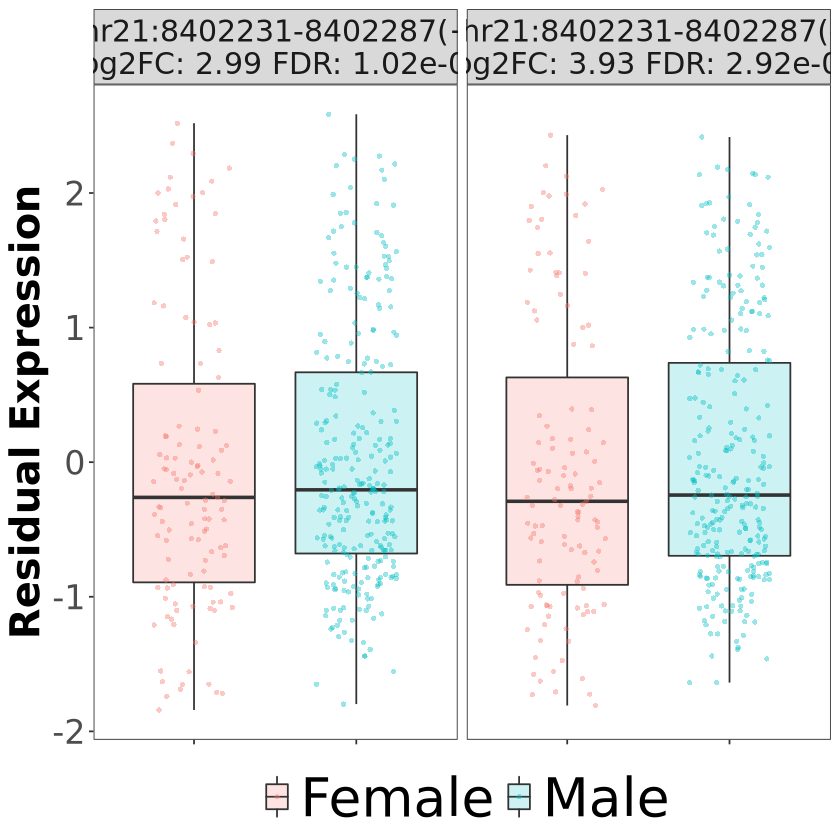

In [12]:
pjd = position_jitterdodge(jitter.width=1.0)
pp = (ggplot(bigdf2, aes(x=Sex, y=res, fill=Sex)) + geom_boxplot(alpha=0.2, outlier.alpha=0) + 
      geom_jitter(position=pjd, stroke=0, alpha=0.4, aes(color=Sex)) + 
      labs(x='Diagnosis', y='Residual Expression') + facet_grid('~Sex_ID') +
      theme_bw() + theme(axis.text.x=element_blank(), axis.text.y=element_text(size=20), 
                         axis.title.y=element_text(size=24, face='bold'), axis.title.x=element_blank(),
                         strip.text.x=element_text(size=18), strip.text.y=element_blank(), 
                         legend.text=element_text(size=32), legend.title=element_blank(), 
                         legend.position="bottom", panel.grid=element_blank()))
pp

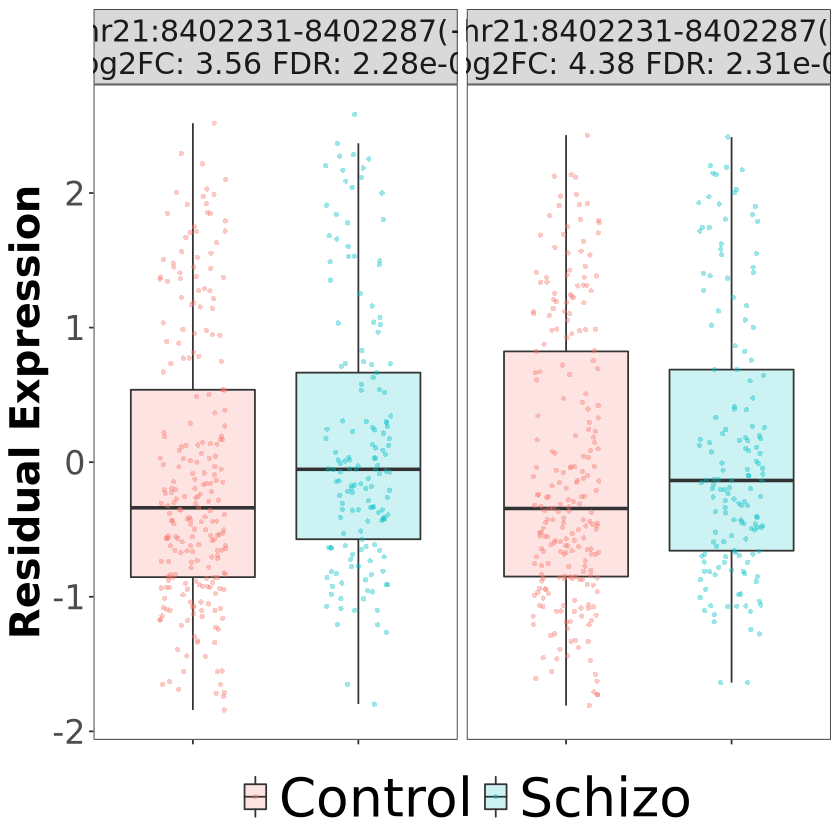

In [13]:
pjd = position_jitterdodge(jitter.width=1.0)
qq = (ggplot(bigdf2, aes(x=Dx, y=res, fill=Dx)) + geom_boxplot(alpha=0.2, outlier.alpha=0) + 
      geom_jitter(position=pjd, stroke=0, alpha=0.4, aes(color=Dx)) + 
      labs(x='Diagnosis', y='Residual Expression') + facet_grid('~SZ_ID') +
      theme_bw() + theme(axis.text.x=element_blank(), axis.text.y=element_text(size=20), 
                         axis.title.y=element_text(size=24, face='bold'), axis.title.x=element_blank(),
                         strip.text.x=element_text(size=18), strip.text.y=element_blank(), 
                         legend.text=element_text(size=32), legend.title=element_blank(), 
                         legend.position="bottom", panel.grid=element_blank()))
qq

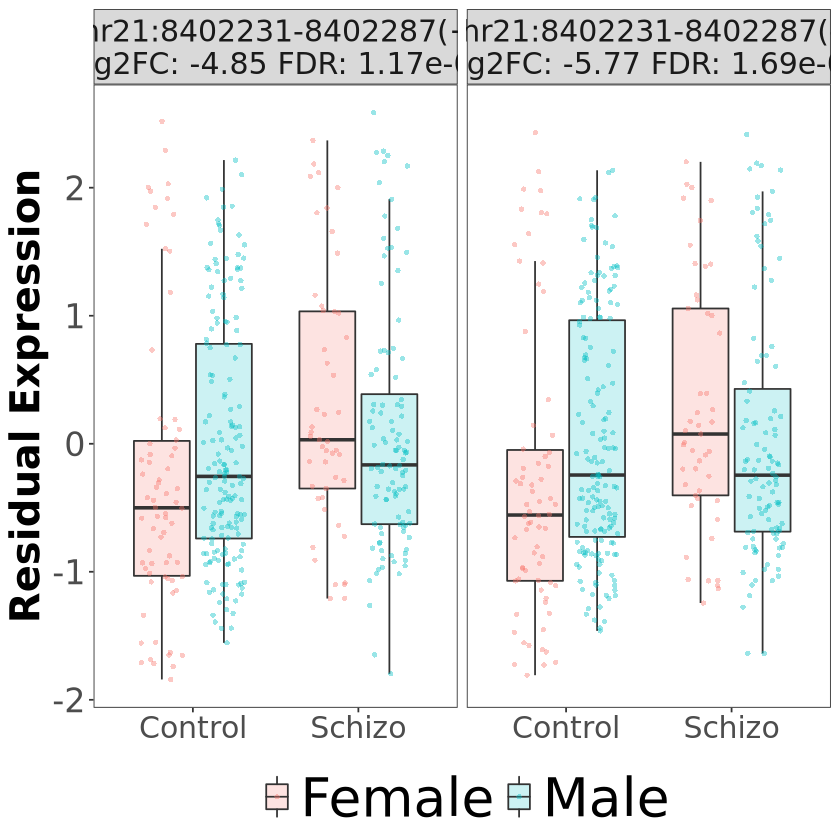

In [14]:
pjd = position_jitterdodge(jitter.width=0.5)
ww = (ggplot(bigdf2, aes(x=Dx, y=res, fill=Sex)) + geom_boxplot(alpha=0.2, outlier.alpha=0) + 
      geom_jitter(position=pjd, stroke=0, alpha=0.4, aes(color=Sex)) + 
      labs(x='Diagnosis', y='Residual Expression') + facet_grid('~New_ID') +
      theme_bw() + theme(axis.text.x=element_text(size=18), axis.text.y=element_text(size=20), 
                         axis.title.y=element_text(size=24, face='bold'), axis.title.x=element_blank(),
                         strip.text.x=element_text(size=18), strip.text.y=element_blank(), 
                         legend.text=element_text(size=32),legend.title=element_blank(),
                         legend.position='bottom',
                         panel.grid=element_blank()))
ww

In [33]:
ggplot_save(pp, 'junc_maleVfemale', 12, 9)
ggplot_save(qq, 'junc_szVctl', 12, 9)
ggplot_save(ww, 'junc_interaction', 12, 9)

## Session Info

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()